In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apple_day.csv to apple_day.csv


##Data Processing

In [ ]:
df = pd.read_csv('apple_day.csv')
df.head()

,datetime,open,high,low,close,volume
0,2024-01-22 15:59:00,193.85001,193.89999,193.73000,193.87000,750800
1,2024-01-22 15:58:00,193.82001,193.88000,193.81000,193.84000,391787
2,2024-01-22 15:57:00,193.67000,193.82001,193.63040,193.81500,305952
3,2024-01-22 15:56:00,193.81500,193.84000,193.65500,193.66000,250295
4,2024-01-22 15:55:00,193.64999,193.83501,193.64999,193.82001,248326


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df.index.hour

Int64Index([15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='datetime', length=390)

##NOTE: when working with data, visualzing the data is CRUCIAL! ALWAYS PLOT YOUR DATA

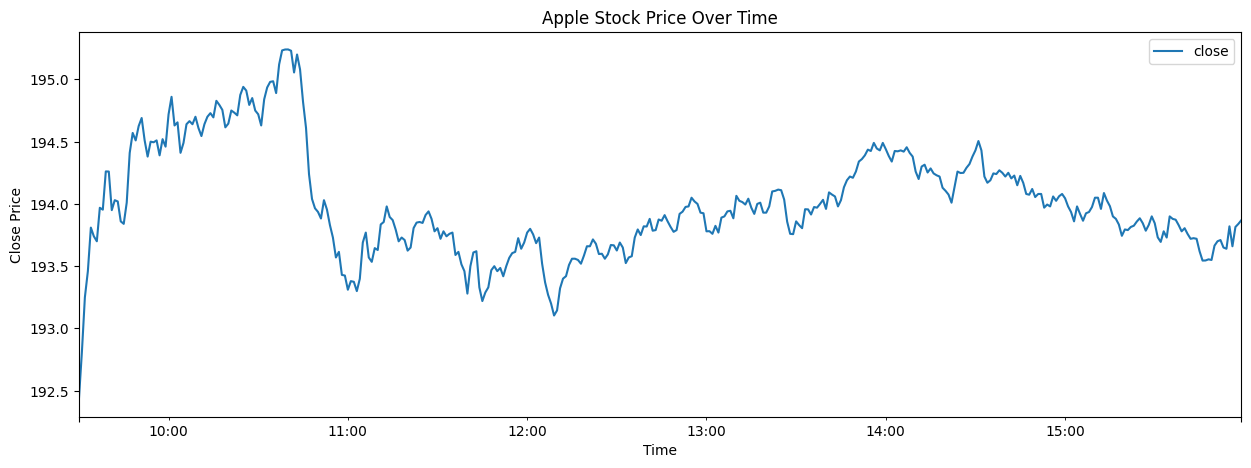

In [ ]:
df.plot(
    y='close',
    title='Apple Stock From 01-22-24',
    figsize=(15,5),
    xlabel='Time',
    ylabel='Close Price')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Apple Stock Price Over Time')
plt.show()


#Feature Selection/Creation

In [ ]:
#we only want to see how the hours are related to the closing stock price

df['hour'] = df.index.hour
df['minute'] = df.index.minute
df.head()

,open,high,low,close,volume,hour,minute
datetime,,,,,,,
2024-01-22 15:59:00,193.85001,193.89999,193.73000,193.87000,750800,15,59
2024-01-22 15:58:00,193.82001,193.88000,193.81000,193.84000,391787,15,58
2024-01-22 15:57:00,193.67000,193.82001,193.63040,193.81500,305952,15,57
2024-01-22 15:56:00,193.81500,193.84000,193.65500,193.66000,250295,15,56
2024-01-22 15:55:00,193.64999,193.83501,193.64999,193.82001,248326,15,55


#Train/Test Split

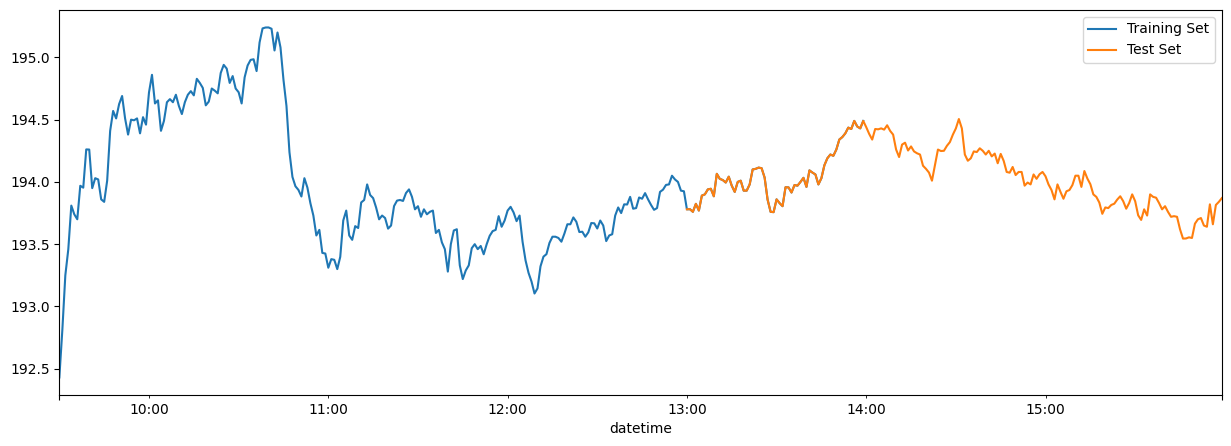

In [ ]:
train = df.loc[df.index.hour <= 13]
test = df.loc[df.index.hour >= 13]

fig, ax = plt.subplots(
    figsize=(15,5)
)

train.plot(ax=ax, y='close', label='Training Set')
test.plot(ax=ax, y='close', label='Test Set')
plt.show()


In [ ]:
features = ['hour']
target = ['close']

x_train = train[features]
y_train = train[target]

print(x_train.shape)
print(y_train.shape)

x_test = test[features]
y_test = test[target]

(270, 1)
(270, 1)


#Creating Our Model -> Linear Regression Model

<ipython-input-62-73dd0e1eeba8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = model.predict(x_test)


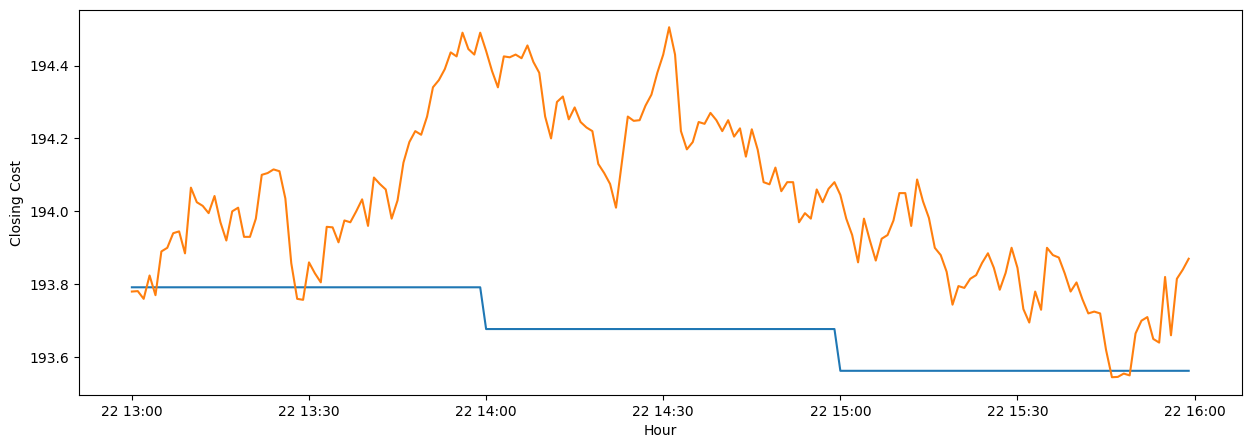

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

model = reg.fit(x_train, y_train)

test['predictions'] = model.predict(x_test)

fig1, ax1 = plt.subplots(figsize=(15,5))


##in terms of making a graph, you need to have an EXACT & CLEAR idea of
##what you want to graph,  or you'll be stuck making graphs for hours

#i want a graph of my test data, with hours on the x and closing price on the y
#i also want the prediction line plotted on the same graph
#i want the plots to be differentiated by color, and labled in a legend

ax1.plot(
    test['predictions']
)

ax1.plot(
    test['close']
)

plt.xlabel("Hour")
plt.ylabel("Closing Cost")
plt.show()

                     minute
datetime                   
2024-01-22 13:59:00      59
2024-01-22 13:58:00      58
2024-01-22 13:57:00      57
2024-01-22 13:56:00      56
2024-01-22 13:55:00      55
...                     ...
2024-01-22 09:34:00      34
2024-01-22 09:33:00      33
2024-01-22 09:32:00      32
2024-01-22 09:31:00      31
2024-01-22 09:30:00      30

[270 rows x 1 columns]
(270, 1)


<ipython-input-64-2ac7bec7d533>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions_min'] = predictions_min


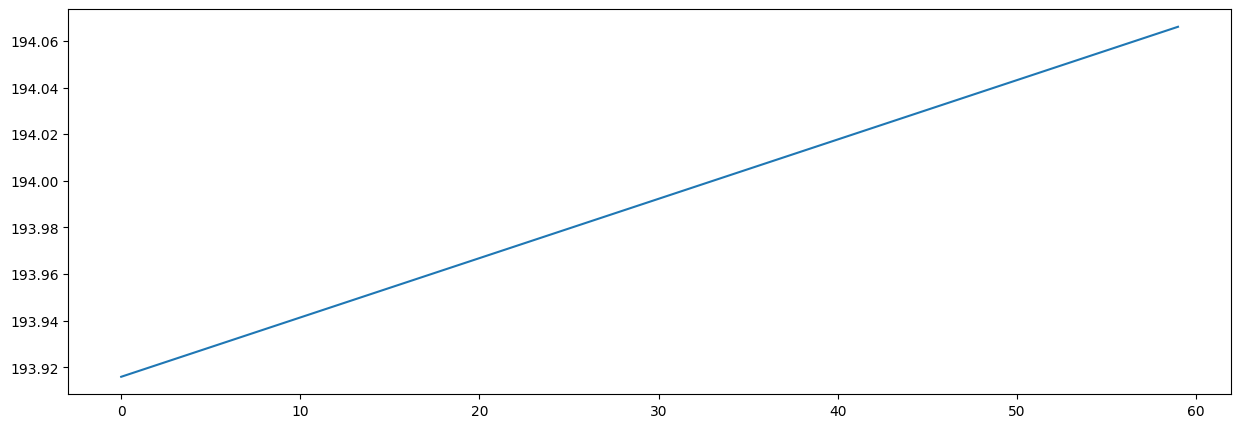

In [ ]:
#The prediction seemed to be very off, so lets try again, focusing on different features

feature = ['minute']
target = ['close']

x_train_min = train[feature]
y_train_min = train[target]

print(x_train_min)
print(y_train_min.shape)

x_test_min = test[feature]
y_test_min = test[target]

reg = LinearRegression()
model = reg.fit(x_train_min, y_train_min)

predictions_min = model.predict(x_test_min)
test['predictions_min'] = predictions_min

fig2, ax2 = plt.subplots(figsize=(15,5))

ax2.plot(
    test['minute'],
    test['predictions_min']
)

#LESSON
###Analyzing just minutes may not be the best way to look at stocks...
###I'm going to look at the entire day today -> linear regression works better with a lot of parameters i think
###you also want repeated segments of data:
###i think where im going wrong with this data, is that when i look at the hours, i am only looking at one instatnce of how the stock changes
###when the time changes from 1 to 2, 2 to 3, and so on.
###looking at just minutes itself is just plain stupid
###the minute itself has no signifigance without the hour that accompnaies this
###i think the lesson im learning is that i need a really deep understand of the data that i'm looking at  


In [ ]:
#so here i'm going to train the regression model with minutes AND hours
#AND im going to train my data over this one day
#this probably still wouldn't give me any valubale model,
#since the model won't be able to generalize itself for multiple days
#it will be better to train the model with a dataset consisting of multiple days

features = ['minute', 'hour']
target = ['close']

x = df[features]
y = df[target]

reg = LinearRegression()
model = reg.fit(x, y)

predictions = model.predict(x)

#What to Improve Upon

###you need to figure out how indexing the datetime, affects how the data in the pandas dataframe is handled
###do a better job of visualizing what is going on the pandas dataframe